In [25]:
from IPython.display import Image

# Redes Bayesianas

## Introdução

Rede bayesiana é um modelo probabilistco representado por grafos direcionados acíclicos, os quais representam um conjunto de variáveis e suas dependências condicionais. As redes bayesianas são comumente usadas quando se deseja representar relação causal entre variáveis aleatórias.  Tais redes são parametrizadas usando a Distribuição de Probabilidade Condicional (Condicional Probability Distributions - CPD). Cada nó na rede é parametrizado usando $P(n| Pai(n))$, com $Pai(n)$ representando o pai do nó na rede.

Considere que a grama do jardim de uma casa, com sistema de irrigação, esteja molhada. Qual o probabilidade de ter chovido?
Abaixo temos um desenho de uma rede bayesiana para esse caso.

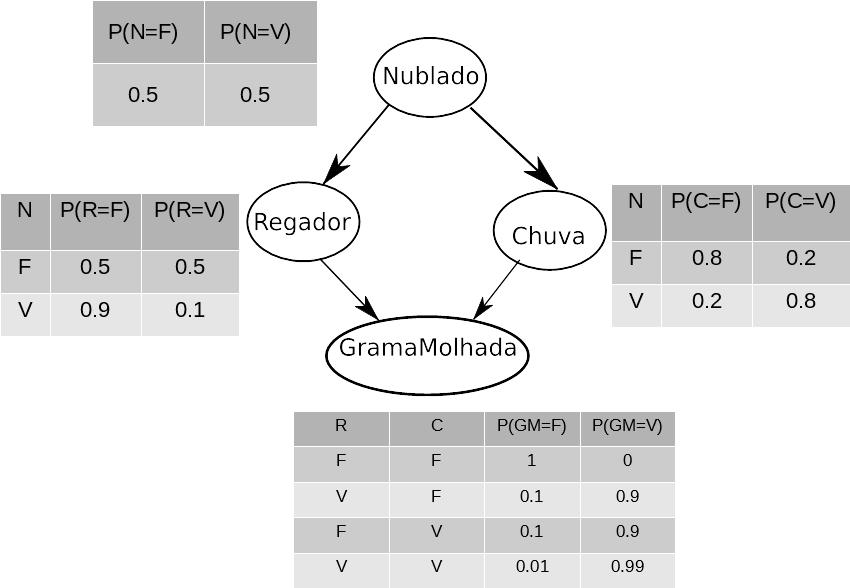

In [26]:
Image(filename='./imagens/gramamolhada.png')

Na figura anterior temos que estar Nublado é causa Pai. Em dia limpo, a pessoa pode ou não ligar o regador, mas em dia nublado teremos uma maior chance do regador não ser acionado. O mesmo ocorre para chuva, em dia limpo temos menos chance de chuva do que em dia seco. Assim, a combinação de fatores possíveis para termos grama molhada vai depender de se choveu ou não e se a pessoa ligou ou não o sistema de irrigação. Note que temos duas causas possíveis para a grama molhada, veja que a tabela final será o resultado da combinação de todos os estamos possíveis para Chuva e Regador. Como são duas causas, o número de combinações possíveis para a tabela de efeito, chuva molhada é de $2^2=4$. De modo geral, a tabela efeito terá o número de linhas dado por $2^{n}$, sendo $n$ o número de causas possíveis associadas a um dado efeito.

## Redes Bayesianas em Python

Usaremos o pgmpy para definir a estrutura de rede e criar as tabelas de Distribuição de Probabilidade Condicional.
O primeiro passo será o de importar as bibliotecas necessárias

In [27]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

Em seguida iremos escrever o nosso modelo de rede bayesiana, a partir das relações contidas nos nós do grafo acíclico. Vamos considerar N como o nó Nublado, R para o nó regador, C para o nó Chuva e G para o Nó GamaMolhada. Veja que esse grafo pode ser representado pela seguinte tupla de nós: ((N,R),(N,C),(R,G),(C,G)).

O modelo desse grafo será escrito em Python como:

In [28]:
#Definicao da estrutura do modelo. Isso sera realizado passando apenas os pares de nos.
model = BayesianModel([('N', 'R'), ('N', 'C'), ('R', 'G'), ('C', 'G')])

Vamos transcrever a Tabela de Probabilidade Condicional para cada um do nós da nossa rede:

I. Tabela para Nublado:

In [29]:
#definicao das tabelas individuais

cpd_n = TabularCPD(variable='N', variable_card=2, values=[[0.5, 0.5]])

II. Tabela para Regador ligado:

In [30]:
cpd_r = TabularCPD(variable='R', variable_card=2, values=[[0.5, 0.9],[0.5, 0.1]],
                   evidence=['N'], evidence_card=[2]
                  )

III. Tabela para Chuva:

In [31]:
cpd_c = TabularCPD(variable='C', variable_card=2, values=[[0.8, 0.2], [0.2, 0.8]],
                   evidence=['N'], evidence_card=[2])

IV. Tabela para Grama Molhada:

In [32]:
cpd_g = TabularCPD(variable='G', variable_card=2, values=[[1,0.1,0.1,0.001],[0,0.9,0.9,0.99]], 
                    evidence=['R','C'], evidence_card=[2,2])




Com as tabelas definidas, precisamos adicioná-las ao nosso modelo

In [33]:
#Associando CPD ao modelo
model.add_cpds(cpd_n, cpd_r, cpd_c, cpd_g)


Para finalizar, precisamos verificar se o modelo foi construído corretamente:

In [34]:
model.check_model()

True

Podemos agora obter as relações das Distribuições de Probabilidade Condicional:

In [35]:
model.get_cpds()

[<TabularCPD representing P(N:2) at 0x1e8ebc09908>,
 <TabularCPD representing P(R:2 | N:2) at 0x1e8ebc09860>,
 <TabularCPD representing P(C:2 | N:2) at 0x1e8ebc09f98>,
 <TabularCPD representing P(G:2 | R:2, C:2) at 0x1e8ebc09fd0>]

In [64]:
print(model.nodes())

['N', 'R', 'C', 'G']


Passando o nome do nó, podemos ter a distribuição de probabilidade condicional para o nó específico:

In [36]:
print(model.get_cpds('G'))

╒═════╤═════╤═════╤═════╤═══════╕
│ R   │ R_0 │ R_0 │ R_1 │ R_1   │
├─────┼─────┼─────┼─────┼───────┤
│ C   │ C_0 │ C_1 │ C_0 │ C_1   │
├─────┼─────┼─────┼─────┼───────┤
│ G_0 │ 1.0 │ 0.1 │ 0.1 │ 0.001 │
├─────┼─────┼─────┼─────┼───────┤
│ G_1 │ 0.0 │ 0.9 │ 0.9 │ 0.99  │
╘═════╧═════╧═════╧═════╧═══════╛


In [37]:
print(model.get_cpds('R'))

╒═════╤═════╤═════╕
│ N   │ N_0 │ N_1 │
├─────┼─────┼─────┤
│ R_0 │ 0.5 │ 0.9 │
├─────┼─────┼─────┤
│ R_1 │ 0.5 │ 0.1 │
╘═════╧═════╧═════╛


In [53]:
print(model.get_cpds('C'))

╒═════╤═════╤═════╕
│ N   │ N_0 │ N_1 │
├─────┼─────┼─────┤
│ C_0 │ 0.8 │ 0.2 │
├─────┼─────┼─────┤
│ C_1 │ 0.2 │ 0.8 │
╘═════╧═════╧═════╛


In [54]:
print(model.get_cpds('N'))

╒═════╤═════╕
│ N_0 │ 0.5 │
├─────┼─────┤
│ N_1 │ 0.5 │
╘═════╧═════╛


Também podemos avaliar a cardinalidade de um dado nó:

In [38]:
model.get_cardinality('G')

2

## Inferência

Vamos considerar uma rede bayesiana para a relação entre Fumar, Câncer e Bronquite:


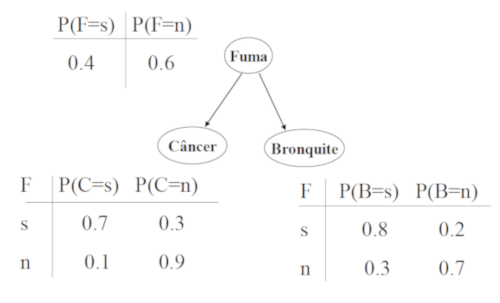

In [60]:
Image(filename='./imagens/fumarCancer.png')

A partir da rede anterior, qual a probabilidade de alguém ter câncer, sabendo que ela fuma? Qual a probabilidade de algúem ter bronquite, se ela fuma? Qual a porcentagem das pessoas que fuma?

$P(C|F) = 0.7$, $P(B|F) = 0.8$, $P(F) = 0.4$.

Vamos mudar a pergunta. Sabendo que a pessoa teve cancer, qual a probabilidade dessa pessoa ter fumado?
Ou seja, queremos encontrar:

$P(F=V|C=V)=\frac{P(F=V \land C=V)}{P(C=V)}$

Primeiramente precisamos resolver a relação $P(F=V \land C=V)$.

Lembrando o Teorema de Bayes: 

$P(a\land b) = P(a|b)P(b)$, 

$P(b\land a) = P(b|a)P(a)$

$P(b|a) = \frac{P(a|b)P(b)}{P(a)}$



Podemos então calcular:

$P(F=V \land C=V) = P(C=V|F=V)P(F=V) = 0,7\times0,4=0,28$

Já a relação $P(C=V)$ é dada por:

$P(C=V) = \sum_{i} P(C=V|F=i)P(F=i)$



Já a relação $P(C=V)$ é dada por:

$P(C=V) = \sum_{i} P(C=V|F=i)P(F=i)$

$P(C=V) = P(C=V|F=V)P(F=V) + P(C=V|F=F)P(F=F)$

$P(C=V) = (0,7 \times 0,4) + (0,1 \times 0,6) = 0,34$


Dessa forma, tempos que:

$P(F=V|C=V)=\frac{P(F=V \land C=V)}{P(C=V)} = 0,28 / 0,34 = 0,82$

Ou seja, podemos dizer, com 82% de certeza,  que uma pessoa com câncer fumava. Lembre que isso é válido para a rede bayesiana apresentada anteriormente.



## Exercícios

1. Calcule a probabilidade de ter chovido, sabendo que a grama está molhada.




Dica: 

$P(C=1|G=1) = \frac{P(C=1 \land G=1)}{P(G=1)}$

$P(C=1 \land G=1) = \sum_{i} P(N=i,R=i,C=1,G=1)$

$P(G=1) = \sum_{ijk}P(N=i,R=j,C=k,G=1)$

2. A partir da rede bayesiana da relação Fumar x Câncer, escreva um programa em python para esse modelo de rede, usando pgmpy.

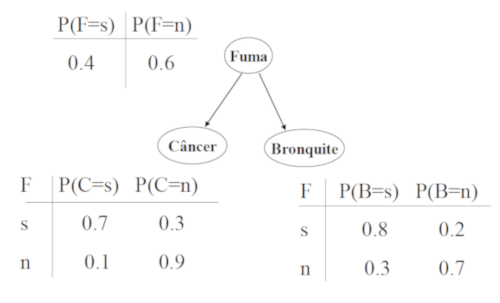

In [69]:
Image(filename='./imagens/fumarCancer.png')

In [68]:
from pgmpy.inference import VariableElimination
gramaMolhada_inferencia = VariableElimination(model)
prob_c = gramaMolhada_inferencia.query(variables=['C'], evidence={'G': 1})
print(prob_c['C'])


╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.2921 │
├─────┼──────────┤
│ C_1 │   0.7079 │
╘═════╧══════════╛
